### For the project Load Ames Iowa Test & Train data from Kaggle to PostgreSQL. Import all required Libraries

In [1]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def connect_to_db():
    con = pg2.connect(host='localhost',
                      dbname='Learning',
                      user='postgres',
                      password = 'bubulu$223')
    cur = con.cursor(cursor_factory=RealDictCursor)
    return con, cur

def query_to_dictionary(query, fetch_res=True):
    con, cur = connect_to_db()
    cur.execute(query)
    if fetch_res:
        results = cur.fetchall()
    else:
        results = None
    con.close()
    return results

def query_to_dataframe(query):
    return DataFrame(query_to_dictionary(query))

In [4]:
connection, cursor = connect_to_db()
result = cursor.execute("SELECT * FROM train LIMIT 2;")
pd.DataFrame(cursor.fetchall())

,1stFlrSF,2ndFlrSF,3SsnPorch,alley,bedroomabvgr,bldgtype,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,...,saletype,screenporch,street,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremodadd,yrsold
0,856,854,0,None,3,1Fam,TA,No,706,0,...,WD,0,Pave,856,8,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,1262,6,AllPub,298,1976,1976,2007


In [5]:
query_to_dictionary("""SELECT * FROM train LIMIT 2;""")

[{'1stFlrSF': 856,
  '2ndFlrSF': 854,
  '3SsnPorch': 0,
  'alley': None,
  'bedroomabvgr': 3,
  'bldgtype': '1Fam',
  'bsmtcond': 'TA',
  'bsmtexposure': 'No',
  'bsmtfinsf1': 706,
  'bsmtfinsf2': 0,
  'bsmtfintype1': 'GLQ',
  'bsmtfintype2': 'Unf',
  'bsmtfullbath': 1,
  'bsmthalfbath': 0,
  'bsmtqual': 'Gd',
  'bsmtunfsf': 150,
  'centralair': 'Y',
  'condition1': 'Norm',
  'condition2': 'Norm',
  'electrical': 'SBrkr',
  'enclosedporch': 0,
  'extercond': 'TA',
  'exterior1st': 'VinylSd',
  'exterior2nd': 'VinylSd',
  'exterqual': 'Gd',
  'fence': None,
  'fireplacequ': None,
  'fireplaces': 0,
  'foundation': 'PConc',
  'fullbath': 2,
  'functional': 'Typ',
  'garagearea': 548,
  'garagecars': 2,
  'garagecond': 'TA',
  'garagefinish': 'RFn',
  'garagequal': 'TA',
  'garagetype': 'Attchd',
  'garageyrblt': 2003.0,
  'grlivarea': 1710,
  'halfbath': 1,
  'heating': 'GasA',
  'heatingqc': 'Ex',
  'housestyle': '2Story',
  'id': 1,
  'kitchenabvgr': 1,
  'kitchenqual': 'Gd',
  'landco

### Load the data & analyse

In [6]:
df_ames = pd.DataFrame(query_to_dictionary("""SELECT * FROM train;"""))

In [7]:
df_ames.shape

(1460, 81)

In [8]:
df_ames.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,alley,bedroomabvgr,bldgtype,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,...,saletype,screenporch,street,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremodadd,yrsold
0,856,854,0,None,3,1Fam,TA,No,706,0,...,WD,0,Pave,856,8,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,1262,6,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,920,6,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216,0,...,WD,0,Pave,756,7,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655,0,...,WD,0,Pave,1145,9,AllPub,192,2000,2000,2008


In [9]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
alley            91 non-null object
bedroomabvgr     1460 non-null int64
bldgtype         1460 non-null object
bsmtcond         1423 non-null object
bsmtexposure     1422 non-null object
bsmtfinsf1       1460 non-null int64
bsmtfinsf2       1460 non-null int64
bsmtfintype1     1423 non-null object
bsmtfintype2     1422 non-null object
bsmtfullbath     1460 non-null int64
bsmthalfbath     1460 non-null int64
bsmtqual         1423 non-null object
bsmtunfsf        1460 non-null int64
centralair       1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
electrical       1459 non-null object
enclosedporch    1460 non-null int64
extercond        1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null 

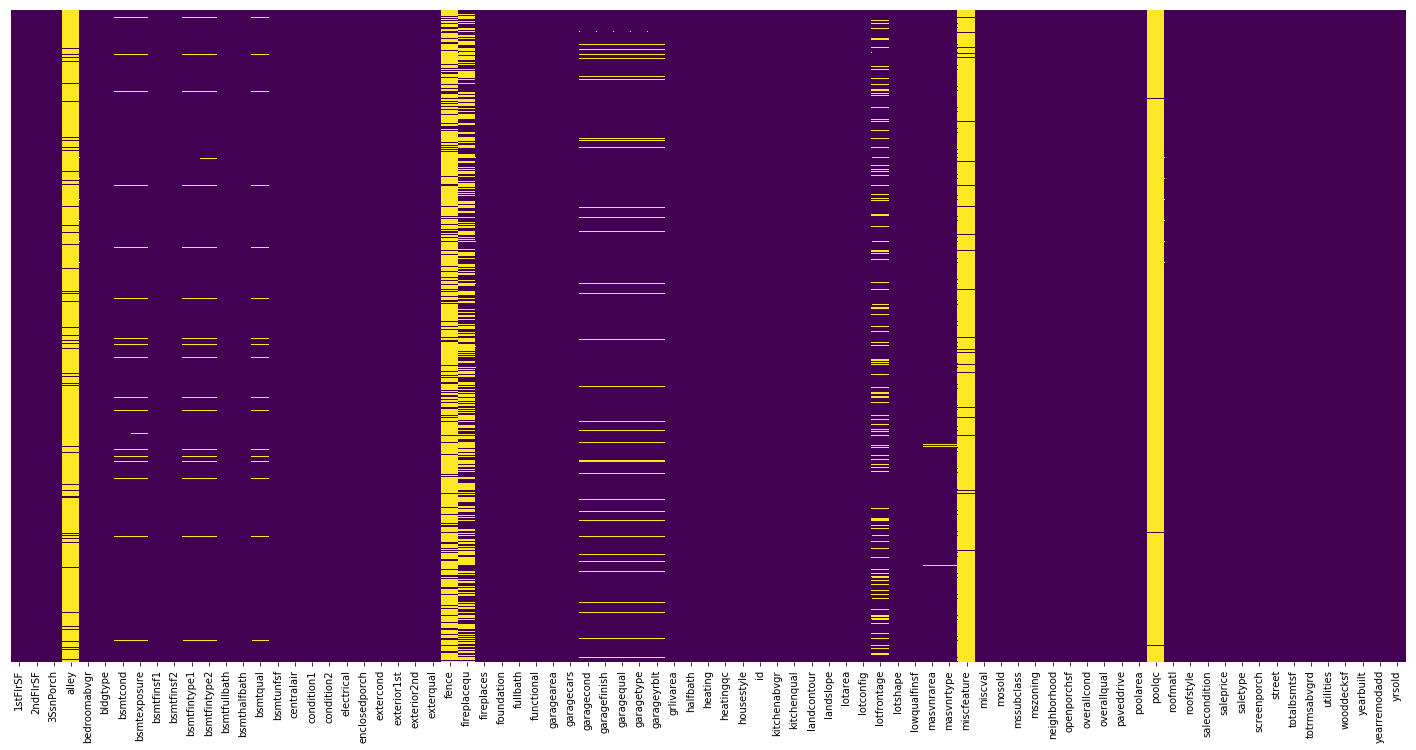

In [10]:
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df_ames.isnull(),yticklabels=False,cbar=False,cmap="viridis")

**Seeing the above graph we can visualize lot of missing values for Alley, Fence,Fireplacequ,Miscfeature,Poolqc.
Will perform some EDA before dropping or replacling missing value.**

Below graph represent Correlation so that we can correlate features & do some data cleaning.

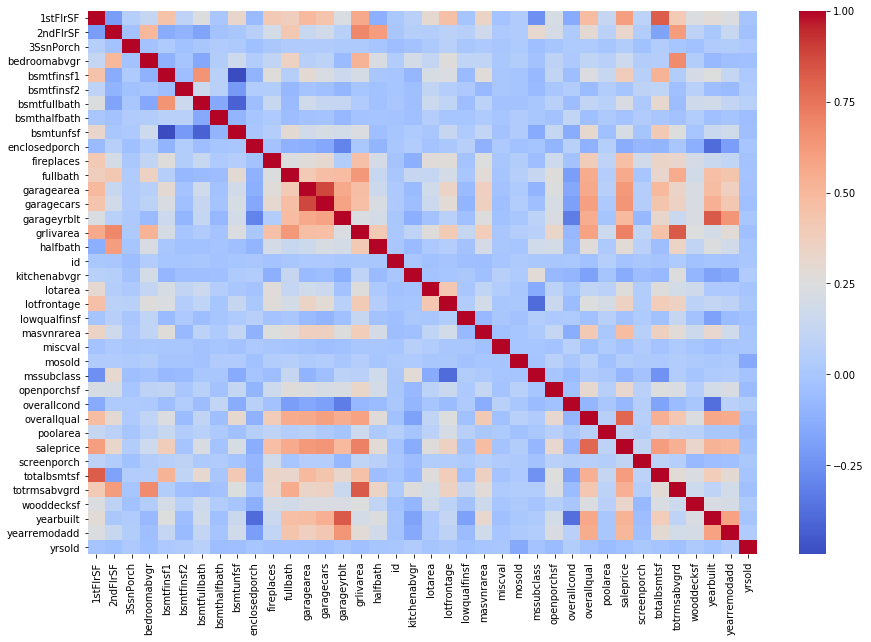

In [11]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_ames.corr(),cmap = 'coolwarm')

### Handle Missing Values using EDA

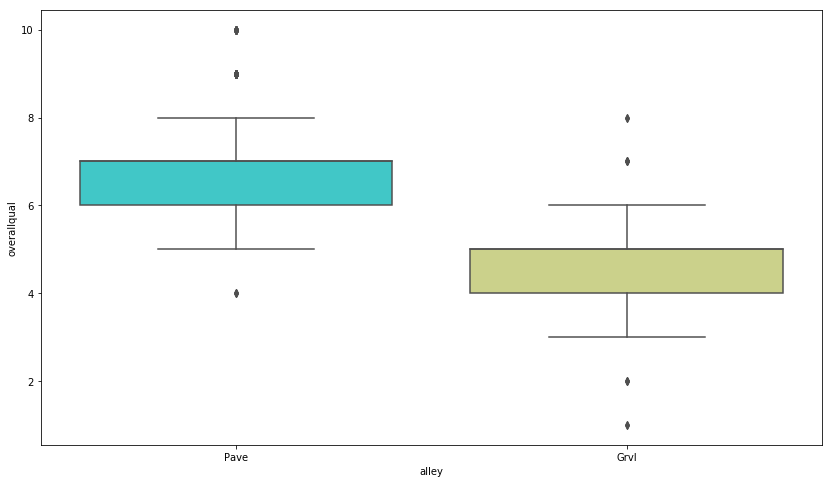

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot(x='alley',y='overallqual',data=df_ames,palette='rainbow')

Above box plot represents that Pave Alley has a OverallQual more than 6, so we can handle missing data for alley using this condition.

**1. Handle Missing Value for Alley**

In [13]:
def impute_alley(cols):
    Alley = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Alley):
        
        if Overallqual < 6:
            return "Grvl"
        else:
            return "Pave"
    else:
        return Alley

In [14]:
df_ames['alley'] = df_ames[['alley','overallqual']].apply(impute_alley,axis =1)

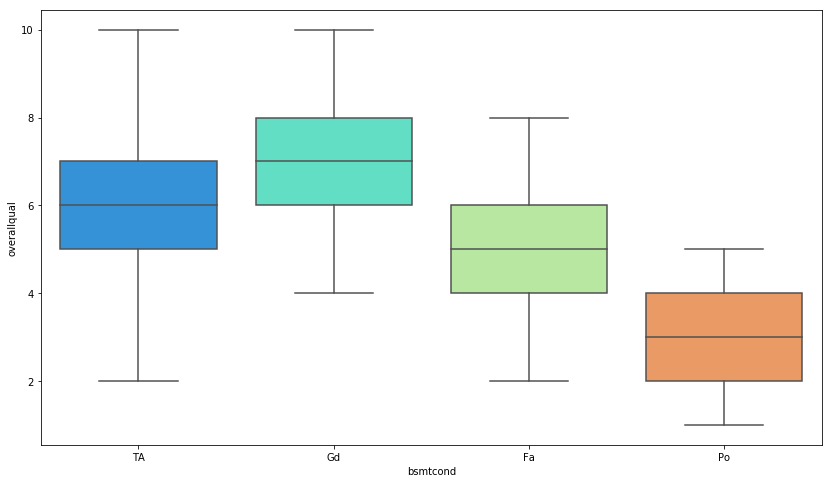

In [16]:
plt.figure(figsize=(14,8))
sns.boxplot(x='bsmtcond',y='overallqual',data=df_ames,palette='rainbow')

**2. Handle Missing Value for BsmtCond**

In [17]:
def impute_bsmtcond(cols):
    Bsmtcond = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Bsmtcond):
        
        if Overallqual < 4:
            return "Po"
        elif Overallqual > 6:
            return "Gd"
        elif Overallqual == 6:
            return "TA"
        else:
            return "Fa"
    else:
        return Bsmtcond

In [18]:
df_ames['bsmtcond'] = df_ames[['bsmtcond','overallqual']].apply(impute_bsmtcond,axis =1)

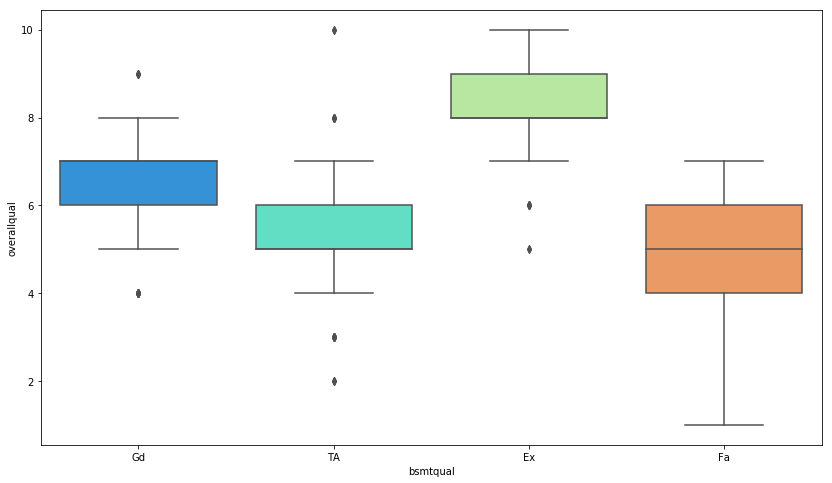

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(x='bsmtqual',y='overallqual',data=df_ames,palette='rainbow')

**3. Handle Missing Value for BsmtQual**

In [20]:
def impute_bsmtqual(cols):
    Bsmtqual = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Bsmtqual):
        
        if Overallqual < 6:
            return "Fa"
        elif Overallqual == 6:
            return "TA"
        elif Overallqual == 7:
            return "Gd"
        else:
            return "Ex"
    else:
        return Bsmtqual

In [21]:
df_ames['bsmtqual'] = df_ames[['bsmtqual','overallqual']].apply(impute_bsmtqual,axis =1)

**4. Handle Missing Value for 'garageyrblt'**

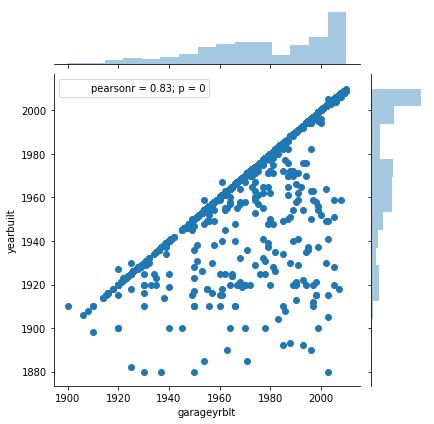

In [22]:
plt.figure(figsize=(14,8))
sns.jointplot(x='garageyrblt',y='yearbuilt',data=df_ames)

** From Above join plot we can see a linearity between yearbuilt & garageyrblt, so we can replace missing valie of garageyrblt based on this linearity.**

In [23]:
def impute_garageyrblt(cols):
    Garageyrblt = cols[0]
    Yearbuilt = cols[1]
    
    if pd.isnull(Garageyrblt):
        return Yearbuilt       

    else:
        return Garageyrblt

In [24]:
df_ames['garageyrblt'] = df_ames[['garageyrblt','yearbuilt']].apply(impute_garageyrblt,axis =1)

Will Handle lotfrontage & masvnrarea missing value with mean value of the feature

**5. Handle Missing Value for 'fireplacequ'**

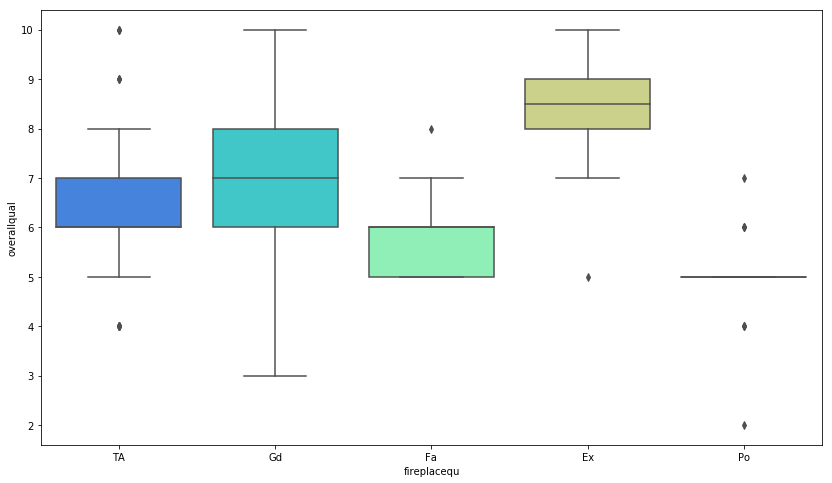

In [25]:
plt.figure(figsize=(14,8))
sns.boxplot(x='fireplacequ',y='overallqual',data=df_ames,palette='rainbow')

In [26]:
def impute_fireplacequ(cols):
    Fireplacequ = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Fireplacequ):
        
        if Overallqual > 8:
            return "Ex"
        elif Overallqual == 8:
            return "Gd"
        elif Overallqual == 7:
            return "TA"
        elif Overallqual == 6:
            return "Fa"
        else:
            return "Po"
    else:
        return Fireplacequ

In [27]:
df_ames['fireplacequ'] = df_ames[['fireplacequ','overallqual']].apply(impute_fireplacequ,axis =1)

**6. Handle Missing Value for 'masvnrtype'**

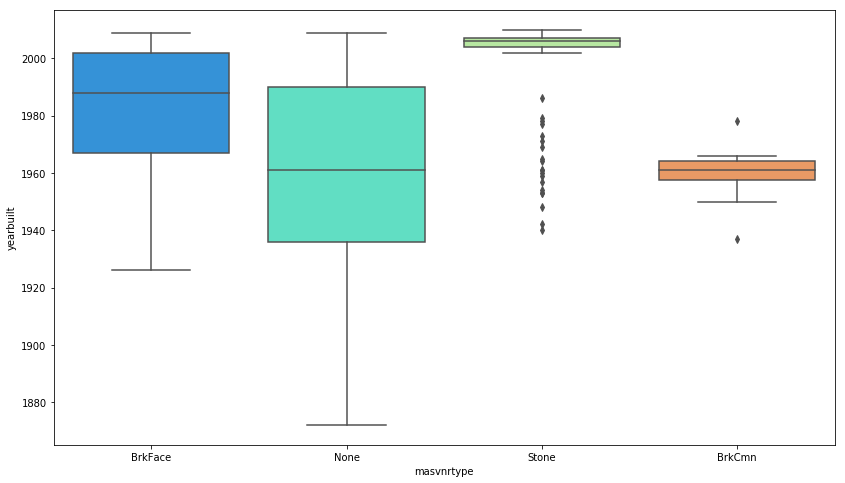

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(x='masvnrtype',y='yearbuilt',data=df_ames,palette='rainbow')

In [29]:
def impute_masvnrtype(cols):
    Masvnrtype = cols[0]
    Yearbuilt = cols[1]
    
    if pd.isnull(Masvnrtype):
        
        if Yearbuilt > 2000:
            return 'Stone'
        elif Yearbuilt < 1965:
            return 'BrkCmn'
        elif Yearbuilt <=2000 and Yearbuilt >= 1965:
            return 'BrkFace'

    else:
        return Masvnrtype

In [30]:
df_ames['masvnrtype'] = df_ames[['masvnrtype','yearbuilt']].apply(impute_masvnrtype,axis =1)

**7. Handle Missing Value for 'masvnrarea'**

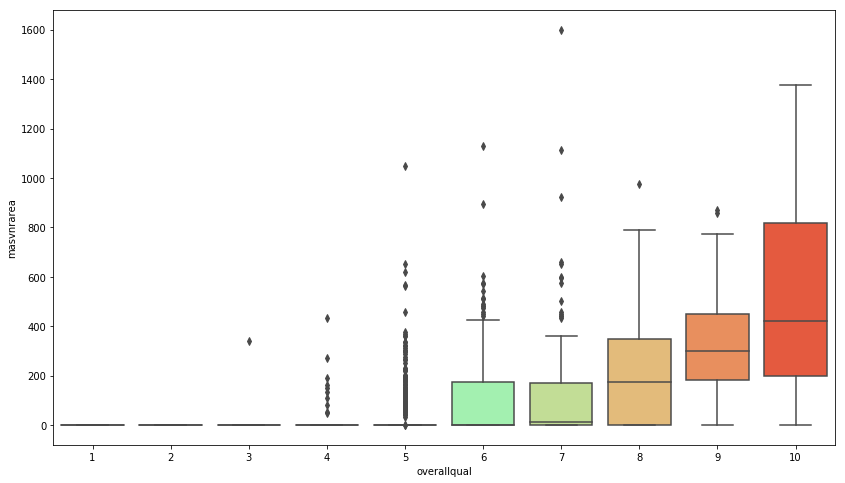

In [31]:
plt.figure(figsize=(14,8))
sns.boxplot(x='overallqual',y='masvnrarea',data=df_ames,palette='rainbow')

In [32]:
def impute_masvnrarea(cols):
    Masvnrarea = cols[0]
    Overallqual = cols[1]
    
    if pd.isnull(Masvnrarea):
        
        if Overallqual == 10:
            return 400
        elif Overallqual == 9:
            return 300
        elif Overallqual == 8:
            return 200
        elif Overallqual == 7:
            return 100
        elif Overallqual == 6:
            return 50
        else:
            return 0
    else:
        return Masvnrarea

In [33]:
df_ames['masvnrarea'] = df_ames[['masvnrarea','overallqual']].apply(impute_masvnrarea,axis =1)

**8. Handle Missing Value for 'garagequal'**

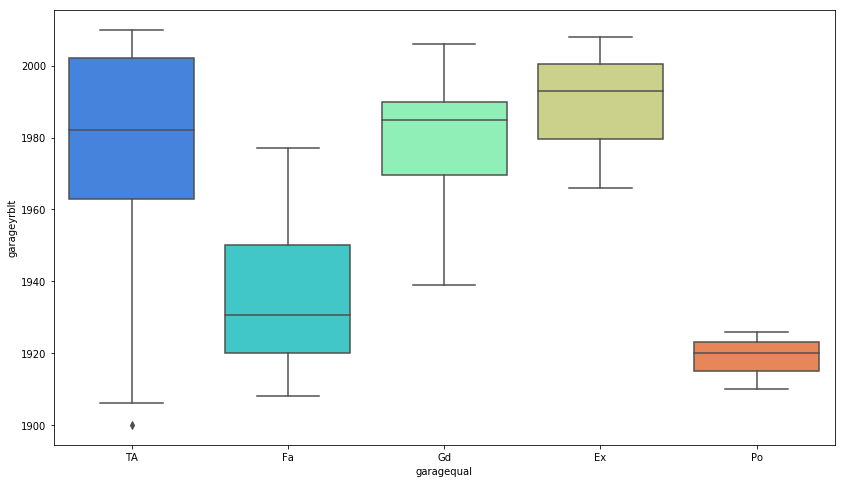

In [34]:
plt.figure(figsize=(14,8))
sns.boxplot(x='garagequal',y='garageyrblt',data=df_ames,palette='rainbow')

In [35]:
def impute_garagequal(cols):
    Garagequal = cols[0]
    Garageyrblt = cols[1]
    
    if pd.isnull(Garagequal):
        
        if Garageyrblt >= 1990:
            return "Ex"
        elif Garageyrblt <= 1920:
            return "Po"
        elif Garageyrblt <= 1960 and Garageyrblt > 1920:
            return "Fa"
        elif Garageyrblt > 1980 and Garageyrblt < 1990:
            return "Gd"
        else:
            return "Fa"
    else:
        return Garagequal

In [36]:
df_ames['garagequal'] = df_ames[['garagequal','garageyrblt']].apply(impute_garagequal,axis =1)

**Move all Test Data from Database to DataFrame**

In [39]:
df_test = pd.DataFrame(query_to_dictionary("""SELECT * FROM test;"""))

In [40]:
df_test.shape

(1459, 80)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
3SsnPorch        1459 non-null int64
Id               1459 non-null int64
alley            107 non-null object
bedroomabvgr     1459 non-null int64
bldgtype         1459 non-null object
bsmtcond         1414 non-null object
bsmtexposure     1415 non-null object
bsmtfinsf1       1458 non-null float64
bsmtfinsf2       1458 non-null float64
bsmtfintype1     1417 non-null object
bsmtfintype2     1417 non-null object
bsmtfullbath     1457 non-null float64
bsmthalfbath     1457 non-null float64
bsmtqual         1415 non-null object
bsmtunfsf        1458 non-null float64
centralair       1459 non-null object
condition1       1459 non-null object
condition2       1459 non-null object
electrical       1459 non-null object
enclosedporch    1459 non-null int64
extercond        1459 non-null object
exterior1st      1458

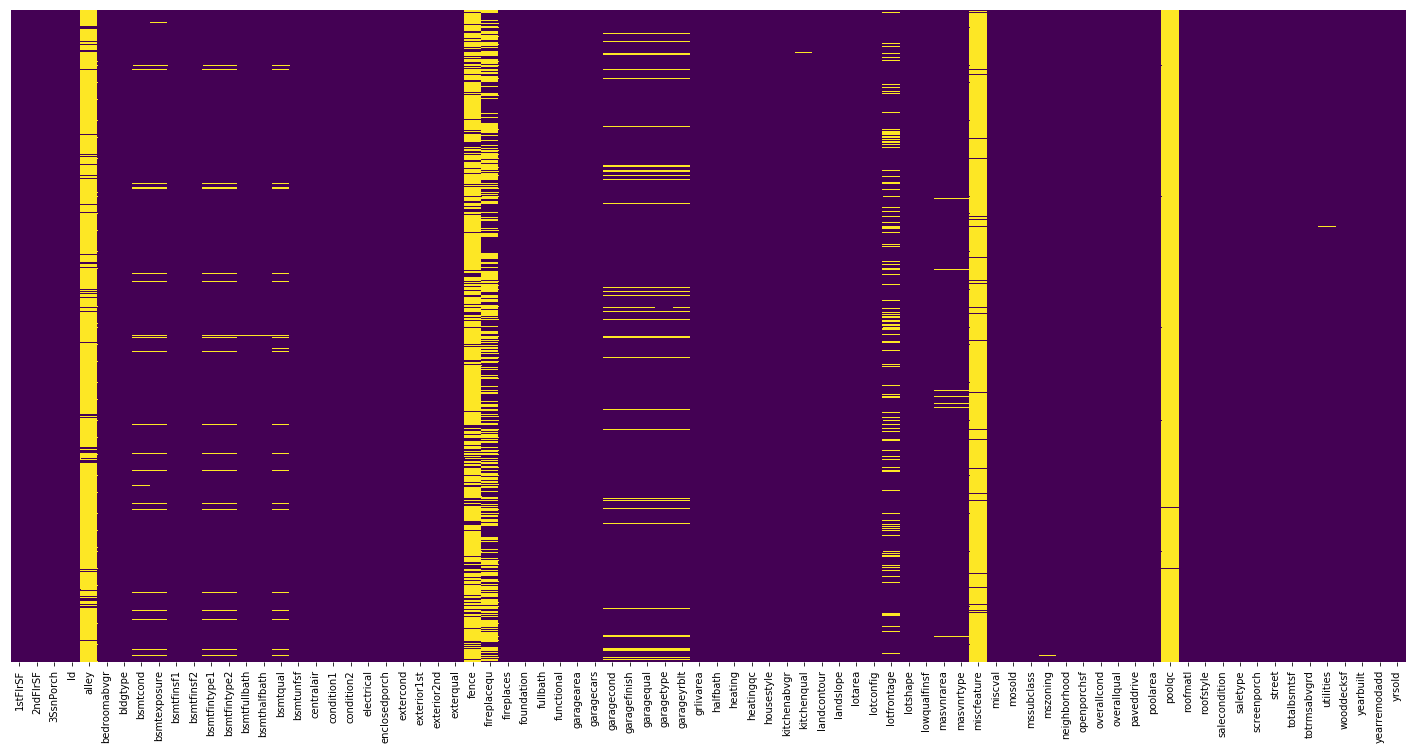

In [43]:
f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [44]:
df_ames.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [45]:
df_test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [46]:
cat_df = df_ames.select_dtypes(include=['object'])

In [47]:
num_df = df_ames.select_dtypes(exclude=['object'])

In [48]:
cat_df.shape

(1460, 43)

In [49]:
num_df.shape

(1460, 38)

In [50]:
num_df.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,overallqual,poolarea,saleprice,screenporch,totalbsmtsf,totrmsabvgrd,wooddecksf,yearbuilt,yearremodadd,yrsold
0,856,854,0,3,706,0,1,0,150,0,...,7,0,208500,0,856,8,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,181500,0,1262,6,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,...,7,0,223500,0,920,6,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,...,7,0,140000,0,756,7,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,250000,0,1145,9,192,2000,2000,2008
5,796,566,320,1,732,0,1,0,64,0,...,5,0,143000,0,796,5,40,1993,1995,2009
6,1694,0,0,3,1369,0,1,0,317,0,...,8,0,307000,0,1686,7,255,2004,2005,2007
7,1107,983,0,3,859,32,1,0,216,228,...,7,0,200000,0,1107,7,235,1973,1973,2009
8,1022,752,0,2,0,0,0,0,952,205,...,7,0,129900,0,952,8,90,1931,1950,2008
9,1077,0,0,2,851,0,1,0,140,0,...,5,0,118000,0,991,5,0,1939,1950,2008


In [51]:
cat_df.head()

,alley,bldgtype,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,bsmtqual,centralair,condition1,condition2,...,mszoning,neighborhood,paveddrive,poolqc,roofmatl,roofstyle,salecondition,saletype,street,utilities
0,Pave,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,RL,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,Pave,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,RL,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,Pave,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,RL,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,Pave,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,RL,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,Pave,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,RL,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


**Numerical features with None values**

In [52]:
numerical_columns_with_null_rows = []
for col in num_df.columns:
    null_mask = num_df[col].isnull()
    null_row_count = num_df[null_mask].shape[0]
    if null_row_count > 0:
        numerical_columns_with_null_rows.append(col)
numerical_columns_with_null_rows

['lotfrontage']

In [53]:
num_df.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,overallqual,poolarea,saleprice,screenporch,totalbsmtsf,totrmsabvgrd,wooddecksf,yearbuilt,yearremodadd,yrsold
0,856,854,0,3,706,0,1,0,150,0,...,7,0,208500,0,856,8,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,181500,0,1262,6,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,...,7,0,223500,0,920,6,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,...,7,0,140000,0,756,7,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,250000,0,1145,9,192,2000,2000,2008
5,796,566,320,1,732,0,1,0,64,0,...,5,0,143000,0,796,5,40,1993,1995,2009
6,1694,0,0,3,1369,0,1,0,317,0,...,8,0,307000,0,1686,7,255,2004,2005,2007
7,1107,983,0,3,859,32,1,0,216,228,...,7,0,200000,0,1107,7,235,1973,1973,2009
8,1022,752,0,2,0,0,0,0,952,205,...,7,0,129900,0,952,8,90,1931,1950,2008
9,1077,0,0,2,851,0,1,0,140,0,...,5,0,118000,0,991,5,0,1939,1950,2008


In [54]:
for col in numerical_columns_with_null_rows:
    num_df[col] = num_df[col].fillna(num_df[col].mean())

C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
num_df.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,overallqual,poolarea,saleprice,screenporch,totalbsmtsf,totrmsabvgrd,wooddecksf,yearbuilt,yearremodadd,yrsold
0,856,854,0,3,706,0,1,0,150,0,...,7,0,208500,0,856,8,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,181500,0,1262,6,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,...,7,0,223500,0,920,6,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,...,7,0,140000,0,756,7,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,250000,0,1145,9,192,2000,2000,2008
5,796,566,320,1,732,0,1,0,64,0,...,5,0,143000,0,796,5,40,1993,1995,2009
6,1694,0,0,3,1369,0,1,0,317,0,...,8,0,307000,0,1686,7,255,2004,2005,2007
7,1107,983,0,3,859,32,1,0,216,228,...,7,0,200000,0,1107,7,235,1973,1973,2009
8,1022,752,0,2,0,0,0,0,952,205,...,7,0,129900,0,952,8,90,1931,1950,2008
9,1077,0,0,2,851,0,1,0,140,0,...,5,0,118000,0,991,5,0,1939,1950,2008


**Categorical features with None values**

In [56]:
categorical_columns_with_null_rows = []
for col in cat_df.columns:
    null_mask = cat_df[col].isnull()
    null_row_count = cat_df[null_mask].shape[0]
    if null_row_count > 0:
        categorical_columns_with_null_rows.append(col)
categorical_columns_with_null_rows

['bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'electrical',
 'fence',
 'garagecond',
 'garagefinish',
 'garagetype',
 'miscfeature',
 'poolqc']

In [57]:
cat_df.dtypes.value_counts()

object    43
dtype: int64

**'miscfeature' & 'poolqc' have lot of missing value, so it can be deleted.**

In [58]:
cat_df.drop(['miscfeature','poolqc'], axis=1,inplace=True)

C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
for col in cat_df.columns:
    cat_df[col].fillna(cat_df[col].mode().values[0], inplace=True)

C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [60]:
cat_df.dtypes.value_counts()

object    41
dtype: int64

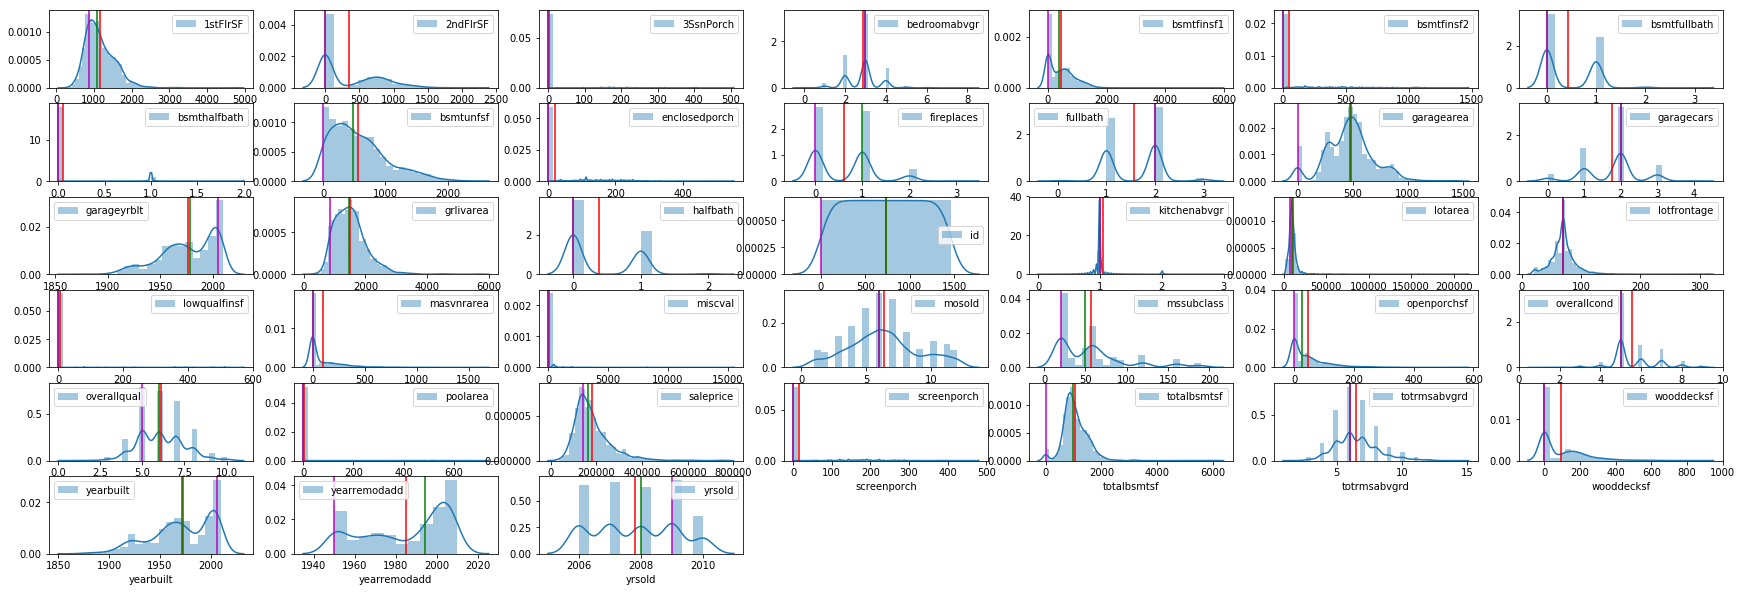

In [61]:
fig = plt.figure(figsize=(30,10))
for i, col in enumerate(num_df.columns):
    fig.add_subplot(6, 7, 1+i)
    sns.distplot(num_df[col], label=col)
    plt.axvline(num_df[col].mean(), c='r')
    plt.axvline(num_df[col].median(), c='g')
    plt.axvline(num_df[col].mode()[0], c='m')
    plt.legend()

In [62]:
merged_df = pd.merge(num_df,cat_df, left_index=True, right_index=True)

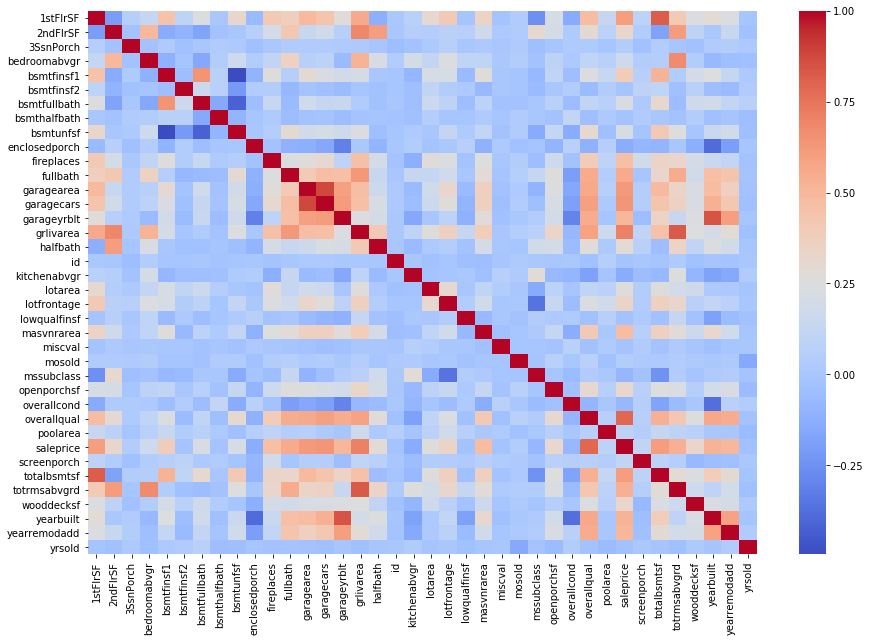

In [63]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(merged_df.corr(),cmap = 'coolwarm')

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
bedroomabvgr     1460 non-null int64
bsmtfinsf1       1460 non-null int64
bsmtfinsf2       1460 non-null int64
bsmtfullbath     1460 non-null int64
bsmthalfbath     1460 non-null int64
bsmtunfsf        1460 non-null int64
enclosedporch    1460 non-null int64
fireplaces       1460 non-null int64
fullbath         1460 non-null int64
garagearea       1460 non-null int64
garagecars       1460 non-null int64
garageyrblt      1460 non-null float64
grlivarea        1460 non-null int64
halfbath         1460 non-null int64
id               1460 non-null int64
kitchenabvgr     1460 non-null int64
lotarea          1460 non-null int64
lotfrontage      1460 non-null float64
lowqualfinsf     1460 non-null int64
masvnrarea       1460 non-null float64
miscval          1460 non-null int64

In [65]:
feature_df = merged_df.drop(['id','saleprice'],axis=1)

In [66]:
feature_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,masvnrtype,mszoning,neighborhood,paveddrive,roofmatl,roofstyle,salecondition,saletype,street,utilities
0,856,854,0,3,706,0,1,0,150,0,...,BrkFace,RL,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1262,0,0,3,978,0,0,1,284,0,...,None,RL,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,920,866,0,3,486,0,1,0,434,0,...,BrkFace,RL,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,961,756,0,3,216,0,1,0,540,272,...,None,RL,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1145,1053,0,4,655,0,1,0,490,0,...,BrkFace,RL,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [67]:
target_df = merged_df['saleprice']

In [68]:
target_df.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

**Save the Target & Feature dataframe into a CSV file**

In [69]:
feature_df.to_csv('../data/feature.csv')

In [70]:
target_df.to_csv('../data/target.csv')

In [71]:
final_train = merged_df.drop(['id'],axis=1)

In [72]:
final_train.to_csv('../data/final_train.csv')